### NLP Project Model
+ Emotion Detection In Text
+ Text Classifier 

In [5]:
# Load EDA Packages
import pandas as pd
import numpy as np

In [6]:
# Load Data Visualization Packages
import seaborn as sns

In [7]:
# Load Data Preprocessing Packages
import neattext.functions as nfx

In [8]:
# load ML Packages

#Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



In [15]:
# Load Dataset
df = pd.read_csv("data\emotion_dataset_2.csv")

In [31]:
df.head(50)

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,NaN,Why ?,Why
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,@Iluvmiasantos ugh babe hugggzzz for u babe ...
5,5,fear,I'm expecting an extremely important phonecall...,Im expecting an extremely important phonecall ...
6,6,sadness,.Couldnt wait to see them live. If missing th...,Couldnt wait to see them live If missing them...
7,7,surprise,maken Tip 2: Stop op een moment dat je het hel...,maken Tip 2: Stop op een moment dat je het hel...
8,8,surprise,En dan krijg je ff een cadeautje van een tweep...,En dan krijg je ff een cadeautje van een tweep...
9,9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,@1116am Drummer Boy bij op verzoek van @BiemO...


In [17]:
# Data Visualization
#Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

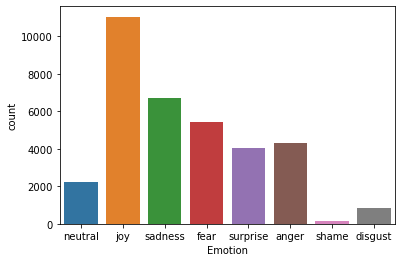

In [18]:
# Plotting
sns.countplot(x='Emotion',data=df)

In [19]:
#Data Preprocessing
dir(nfx)



['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [22]:
# removing user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [23]:
# removing stopwords
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [24]:
# removing special hashtags
df['Clean_Text'] = df['Text'].apply(nfx.remove_hashtags)

In [25]:
# removing special punctuations
df['Clean_Text'] = df['Text'].apply(nfx.remove_punctuations)

In [26]:
df = df.replace(['shame', 'neutral'],[np.NaN, np.NaN])

In [28]:
df.head(20)

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,NaN,Why ?,Why
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,@Iluvmiasantos ugh babe hugggzzz for u babe ...
5,5,fear,I'm expecting an extremely important phonecall...,Im expecting an extremely important phonecall ...
6,6,sadness,.Couldnt wait to see them live. If missing th...,Couldnt wait to see them live If missing them...
7,7,surprise,maken Tip 2: Stop op een moment dat je het hel...,maken Tip 2: Stop op een moment dat je het hel...
8,8,surprise,En dan krijg je ff een cadeautje van een tweep...,En dan krijg je ff een cadeautje van een tweep...
9,9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,@1116am Drummer Boy bij op verzoek van @BiemO...


In [20]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [21]:
# Split data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [22]:
# Building Pipeline
from sklearn.pipeline import Pipeline

In [23]:
# Logistic Regression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [24]:
# train and fit data
pipe_lr.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [25]:
# Check accuracy
pipe_lr.score(x_train,y_train) 

0.9142645971914265

In [26]:
# Check accuracy
pipe_lr.score(x_test,y_test)

0.6356581720636137

In [27]:
# Making a prediction
ex1 = "Today is a good day"

In [28]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [29]:
# Identifying Classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [30]:
# Prediction Probability
pipe_lr.predict_proba([ex1])

array([[2.07025810e-02, 6.43391334e-03, 2.90445176e-02, 6.76631518e-01,
        2.32877627e-02, 8.35788522e-02, 2.06422760e-04, 1.60114433e-01]])

In [32]:
# save model & pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_08_June_2022 trainscore.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

# END

In [71]:
#df_emotions = pd.read_csv("notebooks/data/emotion_dataset_2.csv")

In [33]:
#df_emotions.head()

In [73]:
#wc_dict = {}

In [80]:
#!pip install plotly==5.8.1

In [91]:
#!pip install wordcloud


In [93]:
""" import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

from wordcloud import WordCloud
from IPython.display import Image

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline


for i in df_emotions['emotion'].unique():
    wc_dict[i] = {}
    odds_list = df_emotions[df_emotions['emotion'] == i]['odds'].tolist()
    word_list = df_emotions[df_emotions['emotion'] == i]['word'].tolist()
    wc_dict[i] = dict(dict(zip(word_list,odds_list)))
"""



" import matplotlib.pyplot as plt\n\nimport plotly.graph_objects as go\nimport plotly.express as px\n\nfrom wordcloud import WordCloud\nfrom IPython.display import Image\n\npd.set_option('display.max_rows', None)\npd.set_option('display.max_columns', None)\n%matplotlib inline\n\n\nfor i in df_emotions['emotion'].unique():\n    wc_dict[i] = {}\n    odds_list = df_emotions[df_emotions['emotion'] == i]['odds'].tolist()\n    word_list = df_emotions[df_emotions['emotion'] == i]['word'].tolist()\n    wc_dict[i] = dict(dict(zip(word_list,odds_list)))\n"